**Problem Definition**

Convert the Sign Alphabet to Text

**Data**

[Dataset](https://www.kaggle.com/datasets/datamunge/sign-language-mnist)

1. No cases for the letters J & Z (Reason: J & Z require motion)
2. GrayScale Images
3. Pixel Values Range From 0 to 255
4. Each image contains 784 Pixels


**Evaluation**

Accuracy

**Modelling**

CNN

# Initial End-to-End Workflow (Start)

In [1]:
# Importing required libraries

from sklearn.preprocessing import LabelBinarizer
from tensorflow import keras
from keras.utils import plot_model

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
# loading the training data (X+y)
train_df = pd.read_csv('data/alphabet/sign_mnist_train.csv')

In [3]:
train_df = train_df.sample(frac=1, random_state=42) # Shuffiling the entire dataset

In [4]:
X, y = train_df.drop('label', axis=1), train_df['label'] # Split the dataset into X, y

In [5]:
X.shape, y.shape

((27455, 784), (27455,))

In [6]:
np.unique(X.dtypes), y.dtype

(array([dtype('int64')], dtype=object), dtype('int64'))

In [7]:
label_binarizer = LabelBinarizer() # Binarize labels in a one-vs-all fashion (return one-hot encoded vectors)
y = label_binarizer.fit_transform(y)

In [8]:
X = X/255.0 # Normalizing the training data and converting the data type to float

In [9]:
np.unique(X.dtypes)

array([dtype('float64')], dtype=object)

In [10]:
# Converting the 1-D array of 784 pixels to (28, 28, 1) Image
# (28, 28) represents the spatial dimensions of the image & 1 specifies that the image is grayscale
X = tf.reshape(X, [-1, 28, 28, 1])

In [11]:
X.shape, y.shape

(TensorShape([27455, 28, 28, 1]), (27455, 24))

In [12]:
# Generating a validation set

X_train, X_valid = X[:25000], X[25000:]
y_train, y_valid = y[:25000], y[25000:]

In [13]:
X_train[0].dtype

tf.float64

In [14]:
X_train[0].shape

TensorShape([28, 28, 1])

(<matplotlib.image.AxesImage at 0x2b20152c9d0>,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1]))

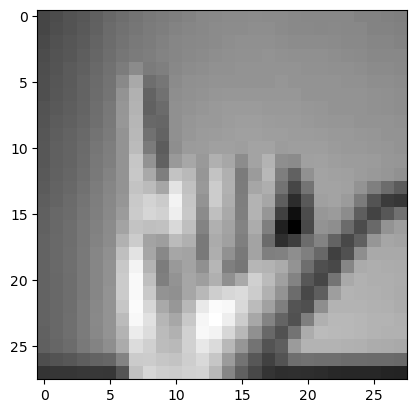

In [15]:
plt.imshow(X[0], cmap='gray'), y[0]

In [16]:
# Defining the CNN

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(24, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
save_best_cb = keras.callbacks.ModelCheckpoint('models/initial-end-to-end', save_best_only=True) # Saves the best model so far
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5) # Interupts training when there is no progress

In [20]:
# The model is same is 'models/initial-end-to-end'
# The history object is 'models/initial-end-to-end-history'

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])

Epoch 1/20
781/782 [============================>.] - ETA: 0s - loss: 0.7486 - accuracy: 0.7721

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 84s 105ms/step - loss: 0.7483 - accuracy: 0.7722 - val_loss: 0.0798 - val_accuracy: 0.9772
Epoch 2/20
781/782 [============================>.] - ETA: 0s - loss: 0.0255 - accuracy: 0.9932

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 60s 77ms/step - loss: 0.0255 - accuracy: 0.9932 - val_loss: 9.5083e-04 - val_accuracy: 1.0000
Epoch 3/20
781/782 [============================>.] - ETA: 0s - loss: 5.3018e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 63s 80ms/step - loss: 5.3006e-04 - accuracy: 1.0000 - val_loss: 3.6599e-04 - val_accuracy: 1.0000
Epoch 4/20
781/782 [============================>.] - ETA: 0s - loss: 1.9877e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 67s 85ms/step - loss: 1.9875e-04 - accuracy: 1.0000 - val_loss: 1.6397e-04 - val_accuracy: 1.0000
Epoch 5/20
781/782 [============================>.] - ETA: 0s - loss: 1.0037e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 70s 89ms/step - loss: 1.0036e-04 - accuracy: 1.0000 - val_loss: 9.4137e-05 - val_accuracy: 1.0000
Epoch 6/20
781/782 [============================>.] - ETA: 0s - loss: 5.5427e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 67s 86ms/step - loss: 5.5412e-05 - accuracy: 1.0000 - val_loss: 4.6711e-05 - val_accuracy: 1.0000
Epoch 7/20
781/782 [============================>.] - ETA: 0s - loss: 2.9764e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 68s 87ms/step - loss: 2.9756e-05 - accuracy: 1.0000 - val_loss: 2.7212e-05 - val_accuracy: 1.0000
Epoch 8/20
781/782 [============================>.] - ETA: 0s - loss: 1.5380e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 64s 82ms/step - loss: 1.5381e-05 - accuracy: 1.0000 - val_loss: 1.6413e-05 - val_accuracy: 1.0000
Epoch 9/20
781/782 [============================>.] - ETA: 0s - loss: 9.2711e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 66s 84ms/step - loss: 9.2694e-06 - accuracy: 1.0000 - val_loss: 9.6152e-06 - val_accuracy: 1.0000
Epoch 10/20
781/782 [============================>.] - ETA: 0s - loss: 5.1393e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 62s 79ms/step - loss: 5.1403e-06 - accuracy: 1.0000 - val_loss: 4.6716e-06 - val_accuracy: 1.0000
Epoch 11/20
781/782 [============================>.] - ETA: 0s - loss: 3.0099e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 65s 82ms/step - loss: 3.0097e-06 - accuracy: 1.0000 - val_loss: 3.2057e-06 - val_accuracy: 1.0000
Epoch 12/20
782/782 [==============================] - 72s 93ms/step - loss: 0.0875 - accuracy: 0.9782 - val_loss: 0.0706 - val_accuracy: 0.9743
Epoch 13/20
782/782 [==============================] - 76s 97ms/step - loss: 0.0128 - accuracy: 0.9964 - val_loss: 5.7482e-04 - val_accuracy: 1.0000
Epoch 14/20
782/782 [==============================] - 70s 90ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 2.1897e-04 - val_accuracy: 1.0000
Epoch 15/20
782/782 [==============================] - 69s 88ms/step - loss: 1.2979e-04 - accuracy: 1.0000 - val_loss: 9.7417e-05 - val_accuracy: 1.0000
Epoch 16/20
782/782 [==============================] - 68s 87ms/step - loss: 6.6368e-05 - accuracy: 1.0000 - val_loss: 5.8030e-05 - val_accuracy: 1.0000


In [21]:
history.history # Contains the training related information for each epoch

{'loss': [0.7483309507369995,
  0.025536516681313515,
  0.0005300564225763083,
  0.00019874981080647558,
  0.00010035900049842894,
  5.5411550420103595e-05,
  2.9755559808108956e-05,
  1.5380595868919045e-05,
  9.269426300306804e-06,
  5.140269422554411e-06,
  3.0097385206317995e-06,
  0.0875314250588417,
  0.012773732654750347,
  0.002977033145725727,
  0.00012978656741324812,
  6.63675382384099e-05],
 'accuracy': [0.7721999883651733,
  0.9932399988174438,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9782000184059143,
  0.9964399933815002,
  0.9991599917411804,
  1.0,
  1.0],
 'val_loss': [0.07981549948453903,
  0.0009508329094387591,
  0.0003659925132524222,
  0.0001639740075916052,
  9.413696534465998e-05,
  4.671063652494922e-05,
  2.7212206987314858e-05,
  1.6413030607509427e-05,
  9.615192539058626e-06,
  4.671603619499365e-06,
  3.2056514100986533e-06,
  0.07055935263633728,
  0.0005748221301473677,
  0.00021896966791246086,
  9.741683606989682e-05,
  5.802

In [22]:
# Saving the history object

with open('models/intial-end-to-end-history', 'wb') as history_file:
     pickle.dump(history.history, history_file)

In [23]:
h = np.load('models/intial-end-to-end-history', allow_pickle=True)
h

{'loss': [0.7483309507369995,
  0.025536516681313515,
  0.0005300564225763083,
  0.00019874981080647558,
  0.00010035900049842894,
  5.5411550420103595e-05,
  2.9755559808108956e-05,
  1.5380595868919045e-05,
  9.269426300306804e-06,
  5.140269422554411e-06,
  3.0097385206317995e-06,
  0.0875314250588417,
  0.012773732654750347,
  0.002977033145725727,
  0.00012978656741324812,
  6.63675382384099e-05],
 'accuracy': [0.7721999883651733,
  0.9932399988174438,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9782000184059143,
  0.9964399933815002,
  0.9991599917411804,
  1.0,
  1.0],
 'val_loss': [0.07981549948453903,
  0.0009508329094387591,
  0.0003659925132524222,
  0.0001639740075916052,
  9.413696534465998e-05,
  4.671063652494922e-05,
  2.7212206987314858e-05,
  1.6413030607509427e-05,
  9.615192539058626e-06,
  4.671603619499365e-06,
  3.2056514100986533e-06,
  0.07055935263633728,
  0.0005748221301473677,
  0.00021896966791246086,
  9.741683606989682e-05,
  5.802

In [24]:
best_model = keras.models.load_model('models/initial-end-to-end') # Model with best set of parameters not necessarily the model at the last epoch of training

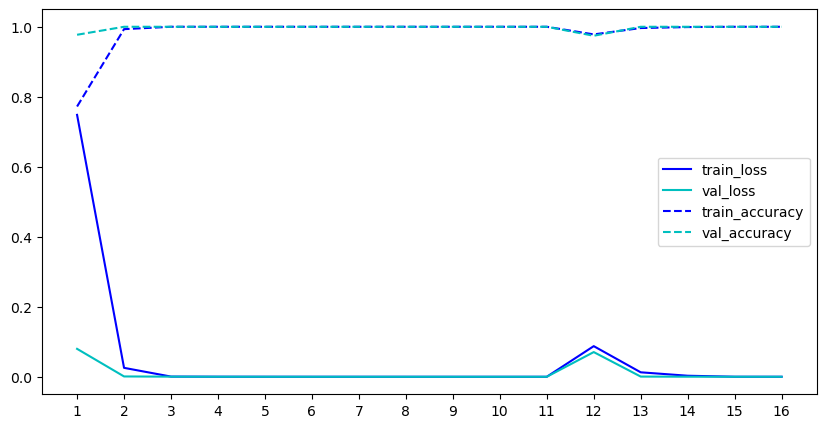

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))
n_epochs = len(h['loss'])
ax.plot(range(1, n_epochs+1), h['loss'], color='b', label='train_loss')
ax.plot(range(1, n_epochs+1), h['val_loss'], color='c', label='val_loss')
ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='c', label='val_accuracy', linestyle='--')
ax.set_xticks(range(1, n_epochs+1))
ax.legend()

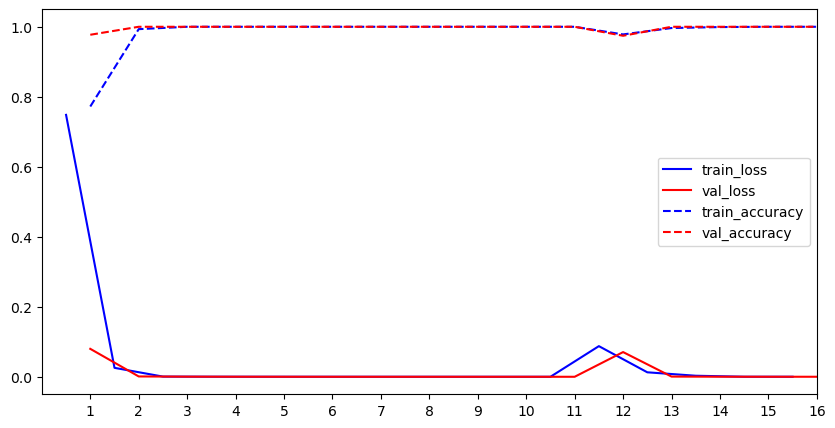

In [27]:
# Training Loss Correction

fig, ax = plt.subplots(figsize=(10, 5))
n_epochs = len(h['loss'])

# Shift training loss by 0.5 as training loss is measured during the epoch and validation loss is measured after the epoch

x_loss = np.arange(n_epochs+1)-0.5
ax.plot(x_loss[x_loss >= 0], h['loss'], color='b', label='train_loss')
ax.plot(range(1, n_epochs+1), h['val_loss'], color='r', label='val_loss')
ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='r', label='val_accuracy', linestyle='--')
ax.set_xlim(0, n_epochs)
ax.set_xticks(range(1, n_epochs+1))
ax.legend()

In [28]:
# Defining a function the get the training and validation plots representing the accuracy and loss at each epoch

def get_train_val_plots(h, yticks=None, figsize=(10, 5)):
    # h: Any dictionary like the history.history
    
    fig, ax = plt.subplots(figsize=figsize)
    n_epochs = len(h['loss'])
    x_loss = np.arange(n_epochs+1)-0.5
    
    ax.plot(x_loss[x_loss >= 0], h['loss'], color='b', label='train_loss')
    ax.plot(range(1, n_epochs+1), h['val_loss'], color='r', label='val_loss')
    ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
    ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='r', label='val_accuracy', linestyle='--')
    ax.set_xlim(0, n_epochs)
    ax.set_xticks(range(1, n_epochs+1))
    if yticks is not None:
        ax.set_yticks(yticks)
    ax.legend()

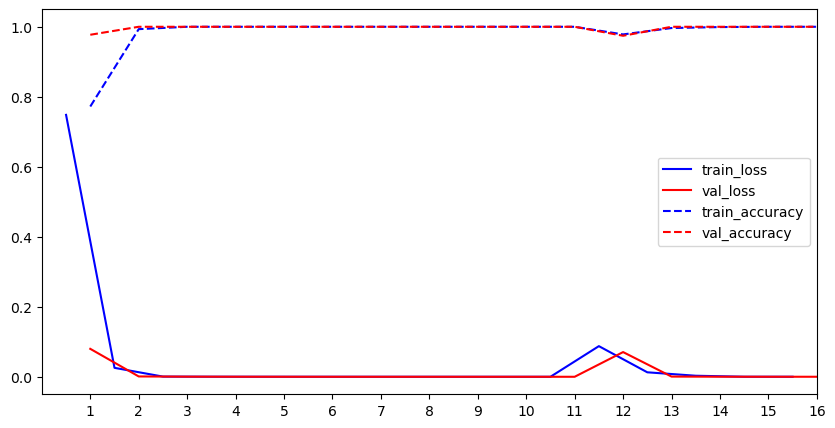

In [29]:
get_train_val_plots(h)

In [30]:
test_df = pd.read_csv('data/alphabet/sign_mnist_test.csv') # Load the test data

In [31]:
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [32]:
X_test = tf.reshape(X_test, [-1, 28, 28, 1])

In [33]:
y_test = label_binarizer.transform(y_test)

In [34]:
best_model.evaluate(X_test, y_test)

225/225 [==============================] - 6s 25ms/step - loss: 91.1311 - accuracy: 0.9162


[91.131103515625, 0.9162018895149231]

Accuracy: 91%

In [35]:
# Preprocesses the input and evaluates the model

def evaluate_model(model, X_test, y_test, label_binarizer):
    X_test_reshape = tf.reshape(X_test, [-1, 28, 28, 1])
    y_test_labels = label_binarizer.transform(y_test)
    results = model.evaluate(X_test_reshape, y_test_labels)
    print(f'Loss: {results[0]:.3f} Accuracy: {results[1]:.3f}')

In [36]:
results = evaluate_model(best_model, test_df.drop('label', axis=1), test_df['label'], label_binarizer)

225/225 [==============================] - 6s 25ms/step - loss: 91.1311 - accuracy: 0.9162
Loss: 91.131 Accuracy: 0.916


## Converting Images to a Sentence

In [37]:
test_df = pd.read_csv('data/alphabet/sign_mnist_test.csv') # Load the test data

In [38]:
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [39]:
X_test = tf.reshape(X_test, [-1, 28, 28, 1])

In [40]:
d = {chr(ord('a') + i):i for i in range(26)}
d_rev = {i:chr(ord('a') + i) for i in range(26)}
d[' '] = d_rev[' '] = ' '

In [41]:
sentence = 'sign language'

for i in sentence:
    print(d[i], end=' ')

18 8 6 13   11 0 13 6 20 0 6 4 

In [42]:
best_model.predict(tf.reshape(X_test[0], [-1, 28, 28, 1]))

1/1 [==============================] - 1s 1s/step


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [43]:
images_taken = []
result = ''

for i in sentence:
    if i != ' ':
        char_index = np.random.choice(y_test[y_test==ord(i)-ord('a')].index)
        images_taken.append(char_index)
        y_pred = best_model.predict(tf.reshape(X_test[char_index], [-1, 28, 28, 1]))
        result += d_rev[label_binarizer.inverse_transform(y_pred)[0]]
    else:
        result += ' '
print(result)

1/1 [==============================] - 0s 18ms/step
sign language


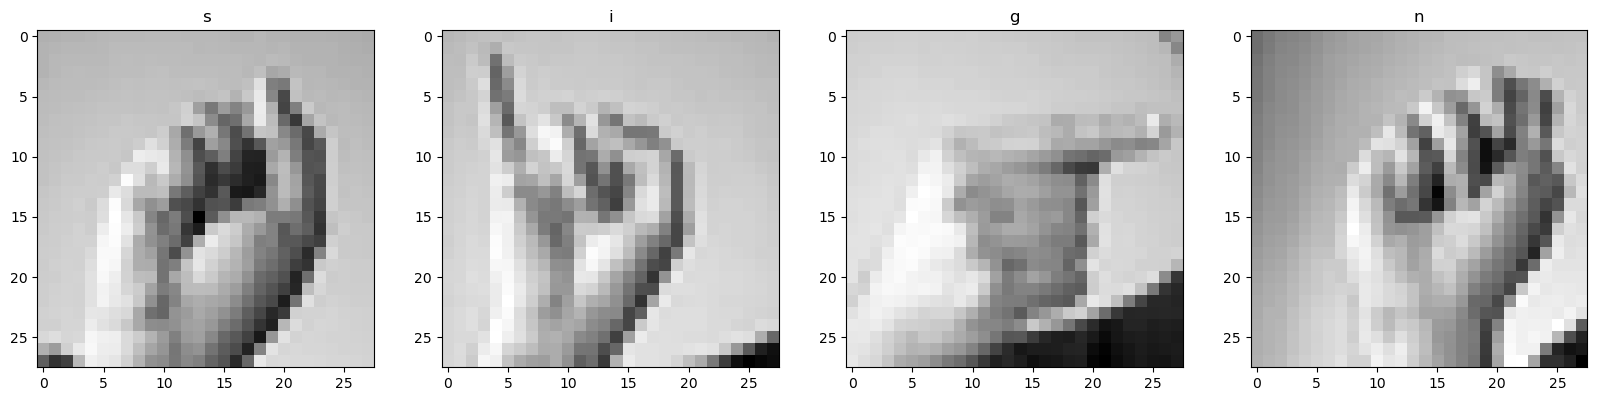

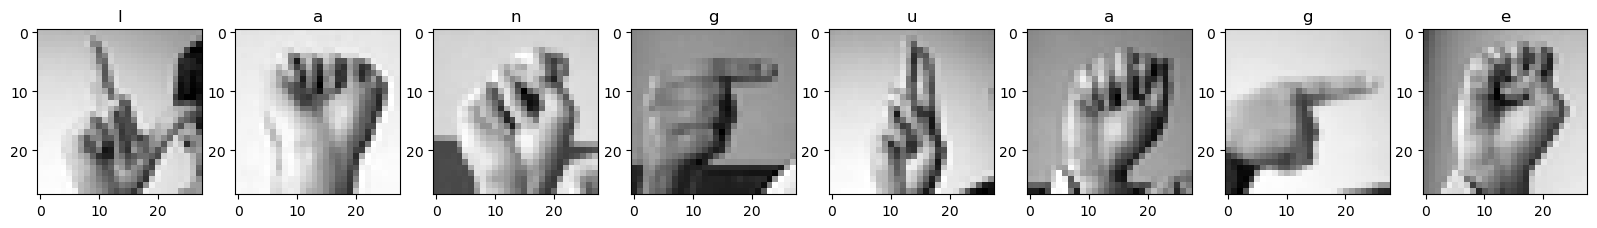

In [44]:
# Visualizing the test images
images_taken_dup = list(reversed(images_taken))
for word in sentence.split():
    fig, ax = plt.subplots(1, len(word), figsize=(20, 20))
    for i in range(len(word)):
        ax[i].imshow(X_test[images_taken_dup.pop()], cmap='gray')
        ax[i].set_title(word[i])

In [45]:
def test_on_sentence(model, sentence, X_test, y_test, label_binarizer, figsize=(20, 20)):
    # Random images are taken from X_test along with the corresponding labels in y_test
    # based on the letters in the sentence.
    # These images are fed to the model and its output is printed
    
    sentence = sentence.lower()
    
    d = {chr(ord('a') + i):i for i in range(26)}
    d_rev = {i:chr(ord('a') + i) for i in range(26)}
    d[' '] = d_rev[' '] = ' '
    
    
    images_taken = []
    result = ''
    
    X_test_reshape = tf.reshape(X_test, [-1, 28, 28, 1])
    

    for i in sentence:
        if i != ' ':
            char_index = np.random.choice(y_test[y_test==ord(i)-ord('a')].index)
            images_taken.append(char_index)
            y_pred = model.predict(tf.reshape(X_test_reshape[char_index], [1, 28, 28, 1]))
            result += d_rev[label_binarizer.inverse_transform(y_pred)[0]]
        else:
            result += ' '
            
    print(f'The actual sentence is "{sentence}"')
    print(f'The predicted sentence is "{result}"')
        
    images_taken.reverse()
    for word in sentence.split():
        fig, ax = plt.subplots(1, len(word), figsize=figsize)
        for i in range(len(word)):
            ax[i].imshow(X_test_reshape[images_taken.pop()], cmap='gray')
            ax[i].set_title(word[i])

1/1 [==============================] - 0s 15ms/step
The actual sentence is "sign language"
The predicted sentence is "siqn language"


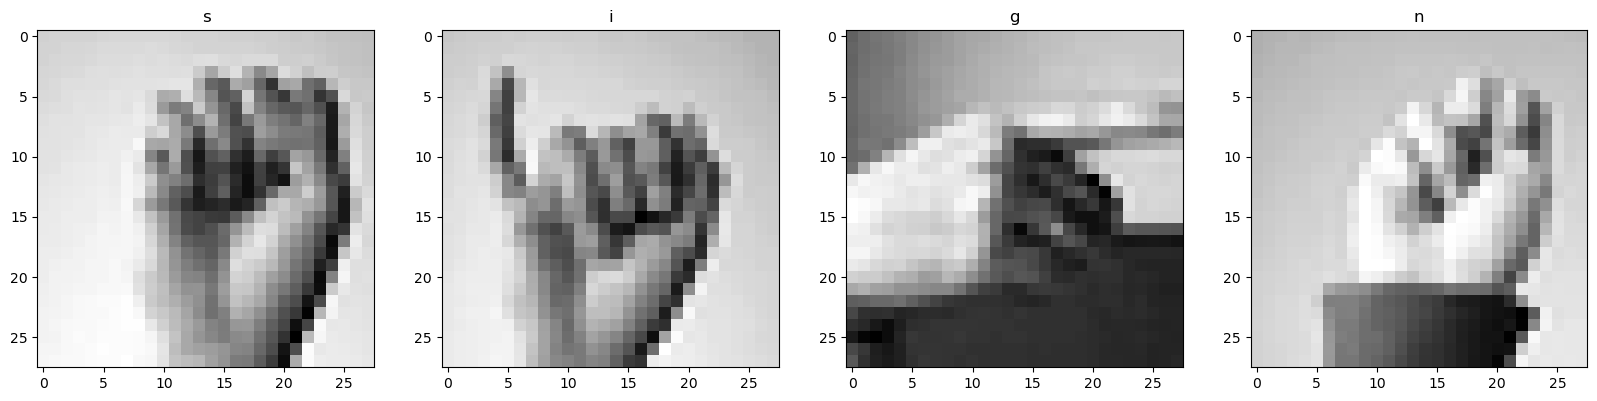

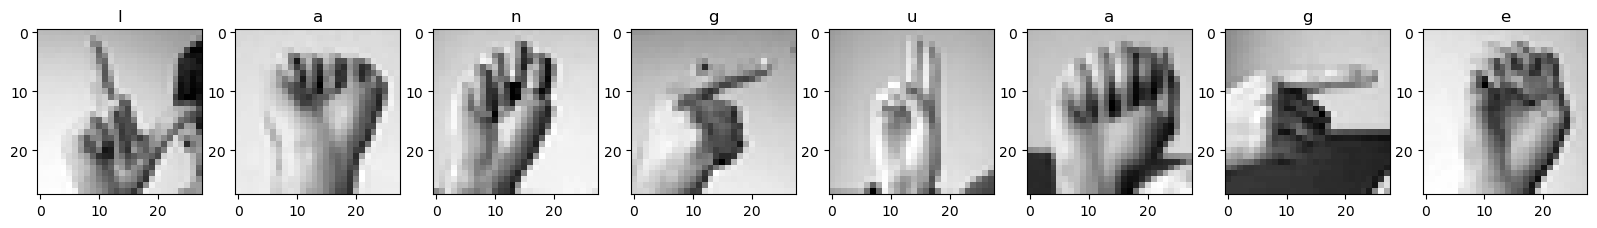

In [46]:
test_on_sentence(best_model, 'sign language', test_df.drop('label', axis=1), test_df['label'], label_binarizer)

# Initial End-to-End Workflow (End)

# Hyperparameter Tuning

1. Convolution and Max Pooling Pairs
2. Filters in the convolution layers
3. Filter Shape
4. Dropout

## Convolution and Max Pooling Pairs

Before flattening


1. For pair = 1 -> Output to the dense layer will be of the shape `(None, 14, 14, 32)`
2. For pair = 2 -> Output to the dense layer will be of the shape `(None, 7, 7, 64)`
3. For pair = 3 -> Output to the dense layer will be of the shape `(None, 3, 3, 96)`
4. For pair = 4 -> Output to the dense layer will be of the shape `(None, 1, 1, 128)`

As the output shape rapidly decreases for the pair = 4 it is better to choose among the pair = 1, 2 or 3

In [47]:
# 20% Validation Split

X_train, X_valid = X[:19500], X[19500:]
y_train, y_valid = y[:19500], y[19500:]

In [48]:
# Models
# 'models/experiment-1-1'
# 'models/experiment-1-2'
# 'models/experiment-1-3'

# History objects
# 'models/experiment-1-1-history'
# 'models/experiment-1-2-history'
# 'models/experiment-1-3-history'

n_pairs = 3
models_pairs = [keras.models.Sequential() for i in range(n_pairs)]
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

for n in range(1, n_pairs+1):
    models_pairs[n-1].add(keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
    models_pairs[n-1].add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    for i in range(1, n):
        models_pairs[n-1].add(keras.layers.Conv2D(32*(i+1), (5, 5), padding='same', activation='relu'))
        models_pairs[n-1].add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    models_pairs[n-1].add(keras.layers.Flatten())
    models_pairs[n-1].add(keras.layers.Dense(128, activation='relu'))
    models_pairs[n-1].add(keras.layers.Dense(24, activation='softmax'))
    models_pairs[n-1].compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    save_best_cb = keras.callbacks.ModelCheckpoint(f'models/experiment-1-{n}', save_best_only=True)
    history = models_pairs[n-1].fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
    with open(f'models/experiment-1-{n}-history', 'wb') as history_file:
        pickle.dump(history.history, history_file)

Epoch 1/15
607/610 [============================>.] - ETA: 0s - loss: 1.1047 - accuracy: 0.6969

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 14s 23ms/step - loss: 1.1017 - accuracy: 0.6976 - val_loss: 0.2877 - val_accuracy: 0.9160
Epoch 2/15
608/610 [============================>.] - ETA: 0s - loss: 0.1218 - accuracy: 0.9813

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 14s 22ms/step - loss: 0.1216 - accuracy: 0.9813 - val_loss: 0.0547 - val_accuracy: 0.9931
Epoch 3/15
609/610 [============================>.] - ETA: 0s - loss: 0.0256 - accuracy: 0.9992

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 14s 22ms/step - loss: 0.0256 - accuracy: 0.9992 - val_loss: 0.0155 - val_accuracy: 0.9999
Epoch 4/15
609/610 [============================>.] - ETA: 0s - loss: 0.0088 - accuracy: 0.9996

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 14s 22ms/step - loss: 0.0088 - accuracy: 0.9996 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 5/15
609/610 [============================>.] - ETA: 0s - loss: 0.0039 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 14s 22ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 6/15
610/610 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 14s 23ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 7/15
610/610 [==============================] - 13s 22ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0094 - val_accuracy: 0.9974
Epoch 8/15
608/610 [============================>.] - ETA: 0s - loss: 0.0286 - accuracy: 0.9908

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 14s 23ms/step - loss: 0.0285 - accuracy: 0.9908 - val_loss: 9.7253e-04 - val_accuracy: 1.0000
Epoch 9/15
610/610 [==============================] - ETA: 0s - loss: 6.8874e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 14s 23ms/step - loss: 6.8874e-04 - accuracy: 1.0000 - val_loss: 5.7164e-04 - val_accuracy: 1.0000
Epoch 10/15
608/610 [============================>.] - ETA: 0s - loss: 4.4420e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 14s 23ms/step - loss: 4.4381e-04 - accuracy: 1.0000 - val_loss: 4.1780e-04 - val_accuracy: 1.0000
Epoch 11/15
608/610 [============================>.] - ETA: 0s - loss: 3.3385e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 14s 23ms/step - loss: 3.3427e-04 - accuracy: 1.0000 - val_loss: 3.3945e-04 - val_accuracy: 1.0000
Epoch 12/15
608/610 [============================>.] - ETA: 0s - loss: 2.5421e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 14s 22ms/step - loss: 2.5381e-04 - accuracy: 1.0000 - val_loss: 2.6398e-04 - val_accuracy: 1.0000
Epoch 13/15
609/610 [============================>.] - ETA: 0s - loss: 2.0073e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 14s 22ms/step - loss: 2.0065e-04 - accuracy: 1.0000 - val_loss: 1.8471e-04 - val_accuracy: 1.0000
Epoch 14/15
610/610 [==============================] - ETA: 0s - loss: 1.4866e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 14s 22ms/step - loss: 1.4866e-04 - accuracy: 1.0000 - val_loss: 1.4739e-04 - val_accuracy: 1.0000
Epoch 15/15
610/610 [==============================] - ETA: 0s - loss: 1.2005e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 14s 23ms/step - loss: 1.2005e-04 - accuracy: 1.0000 - val_loss: 1.1442e-04 - val_accuracy: 1.0000
Epoch 1/15
609/610 [============================>.] - ETA: 0s - loss: 1.0263 - accuracy: 0.6896

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 37s 60ms/step - loss: 1.0258 - accuracy: 0.6897 - val_loss: 0.1447 - val_accuracy: 0.9677
Epoch 2/15
609/610 [============================>.] - ETA: 0s - loss: 0.0527 - accuracy: 0.9886

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 39s 63ms/step - loss: 0.0527 - accuracy: 0.9886 - val_loss: 0.0179 - val_accuracy: 0.9985
Epoch 3/15
609/610 [============================>.] - ETA: 0s - loss: 0.0043 - accuracy: 0.9999

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 38s 62ms/step - loss: 0.0043 - accuracy: 0.9999 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 4/15
609/610 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 44s 72ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 5/15
610/610 [==============================] - 35s 57ms/step - loss: 0.0492 - accuracy: 0.9861 - val_loss: 0.0054 - val_accuracy: 0.9999
Epoch 6/15
610/610 [==============================] - 36s 59ms/step - loss: 0.0060 - accuracy: 0.9990 - val_loss: 0.0053 - val_accuracy: 0.9989
Epoch 7/15
609/610 [============================>.] - ETA: 0s - loss: 7.6440e-04 - accuracy: 0.9999

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 35s 57ms/step - loss: 7.6408e-04 - accuracy: 0.9999 - val_loss: 2.5606e-04 - val_accuracy: 1.0000
Epoch 8/15
609/610 [============================>.] - ETA: 0s - loss: 1.8584e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 36s 59ms/step - loss: 1.8590e-04 - accuracy: 1.0000 - val_loss: 1.4651e-04 - val_accuracy: 1.0000
Epoch 9/15
609/610 [============================>.] - ETA: 0s - loss: 1.1299e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 35s 57ms/step - loss: 1.1299e-04 - accuracy: 1.0000 - val_loss: 9.3077e-05 - val_accuracy: 1.0000
Epoch 10/15
609/610 [============================>.] - ETA: 0s - loss: 7.4606e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 36s 59ms/step - loss: 7.4582e-05 - accuracy: 1.0000 - val_loss: 6.4881e-05 - val_accuracy: 1.0000
Epoch 11/15
609/610 [============================>.] - ETA: 0s - loss: 5.2311e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 36s 59ms/step - loss: 5.2282e-05 - accuracy: 1.0000 - val_loss: 4.6381e-05 - val_accuracy: 1.0000
Epoch 12/15
609/610 [============================>.] - ETA: 0s - loss: 3.7407e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 39s 63ms/step - loss: 3.7396e-05 - accuracy: 1.0000 - val_loss: 3.4629e-05 - val_accuracy: 1.0000
Epoch 13/15
609/610 [============================>.] - ETA: 0s - loss: 2.7052e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 37s 60ms/step - loss: 2.7042e-05 - accuracy: 1.0000 - val_loss: 2.4741e-05 - val_accuracy: 1.0000
Epoch 14/15
609/610 [============================>.] - ETA: 0s - loss: 1.9889e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 35s 57ms/step - loss: 1.9894e-05 - accuracy: 1.0000 - val_loss: 1.7950e-05 - val_accuracy: 1.0000
Epoch 15/15
610/610 [==============================] - ETA: 0s - loss: 1.4439e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 35s 57ms/step - loss: 1.4439e-05 - accuracy: 1.0000 - val_loss: 1.4295e-05 - val_accuracy: 1.0000
Epoch 1/15
609/610 [============================>.] - ETA: 0s - loss: 0.8885 - accuracy: 0.7247

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 46s 74ms/step - loss: 0.8880 - accuracy: 0.7248 - val_loss: 0.0660 - val_accuracy: 0.9818
Epoch 2/15
609/610 [============================>.] - ETA: 0s - loss: 0.0207 - accuracy: 0.9949

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 47s 77ms/step - loss: 0.0207 - accuracy: 0.9949 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 3/15
609/610 [============================>.] - ETA: 0s - loss: 5.9783e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 46s 75ms/step - loss: 5.9763e-04 - accuracy: 1.0000 - val_loss: 3.5027e-04 - val_accuracy: 1.0000
Epoch 4/15
609/610 [============================>.] - ETA: 0s - loss: 2.4269e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 50s 82ms/step - loss: 2.4275e-04 - accuracy: 1.0000 - val_loss: 1.8753e-04 - val_accuracy: 1.0000
Epoch 5/15
609/610 [============================>.] - ETA: 0s - loss: 1.3242e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 53s 87ms/step - loss: 1.3234e-04 - accuracy: 1.0000 - val_loss: 1.1684e-04 - val_accuracy: 1.0000
Epoch 6/15
609/610 [============================>.] - ETA: 0s - loss: 8.0072e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 46s 74ms/step - loss: 8.0030e-05 - accuracy: 1.0000 - val_loss: 8.8970e-05 - val_accuracy: 1.0000
Epoch 7/15
609/610 [============================>.] - ETA: 0s - loss: 5.0118e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 45s 74ms/step - loss: 5.0092e-05 - accuracy: 1.0000 - val_loss: 4.7438e-05 - val_accuracy: 1.0000
Epoch 8/15
609/610 [============================>.] - ETA: 0s - loss: 3.3006e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 45s 75ms/step - loss: 3.2988e-05 - accuracy: 1.0000 - val_loss: 3.2690e-05 - val_accuracy: 1.0000
Epoch 9/15
609/610 [============================>.] - ETA: 0s - loss: 2.1653e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 46s 76ms/step - loss: 2.1648e-05 - accuracy: 1.0000 - val_loss: 2.2445e-05 - val_accuracy: 1.0000
Epoch 10/15
609/610 [============================>.] - ETA: 0s - loss: 1.4376e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 47s 77ms/step - loss: 1.4373e-05 - accuracy: 1.0000 - val_loss: 1.5455e-05 - val_accuracy: 1.0000
Epoch 11/15
609/610 [============================>.] - ETA: 0s - loss: 9.8402e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 50s 83ms/step - loss: 9.8400e-06 - accuracy: 1.0000 - val_loss: 1.0460e-05 - val_accuracy: 1.0000
Epoch 12/15
609/610 [============================>.] - ETA: 0s - loss: 6.7291e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 45s 74ms/step - loss: 6.7258e-06 - accuracy: 1.0000 - val_loss: 7.0421e-06 - val_accuracy: 1.0000
Epoch 13/15
609/610 [============================>.] - ETA: 0s - loss: 4.6660e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 45s 74ms/step - loss: 4.6674e-06 - accuracy: 1.0000 - val_loss: 5.5224e-06 - val_accuracy: 1.0000
Epoch 14/15
609/610 [============================>.] - ETA: 0s - loss: 3.1411e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 45s 74ms/step - loss: 3.1408e-06 - accuracy: 1.0000 - val_loss: 3.5661e-06 - val_accuracy: 1.0000
Epoch 15/15
609/610 [============================>.] - ETA: 0s - loss: 2.2450e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 45s 74ms/step - loss: 2.2438e-06 - accuracy: 1.0000 - val_loss: 2.5837e-06 - val_accuracy: 1.0000


In [32]:
models_pairs[0].summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 6272)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               802944    
                                                                 
 dense_9 (Dense)             (None, 24)                3096      
                                                                 
Total params: 806,872
Trainable params: 806,872
Non-trainable params: 0
________________________________________________

In [49]:
models_pairs[1].summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [50]:
models_pairs[2].summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 96)          153696    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 3, 3, 96)        

In [51]:
for index in range(n_pairs):
    model = keras.models.load_model(f'models/experiment-1-{index+1}')
    model.evaluate(X_valid, y_valid)

249/249 [==============================] - 6s 25ms/step - loss: 2.5837e-06 - accuracy: 1.0000


In [52]:
h_1_1 = np.load('models/experiment-1-1-history', allow_pickle=True)
h_1_2 = np.load('models/experiment-1-2-history', allow_pickle=True)
h_1_3 = np.load('models/experiment-1-3-history', allow_pickle=True)

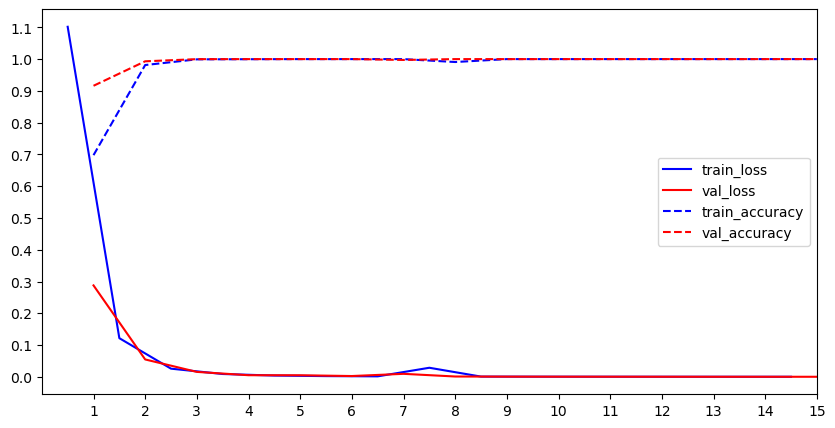

In [53]:
get_train_val_plots(h_1_1, yticks=np.arange(0, 1.2, 0.1))

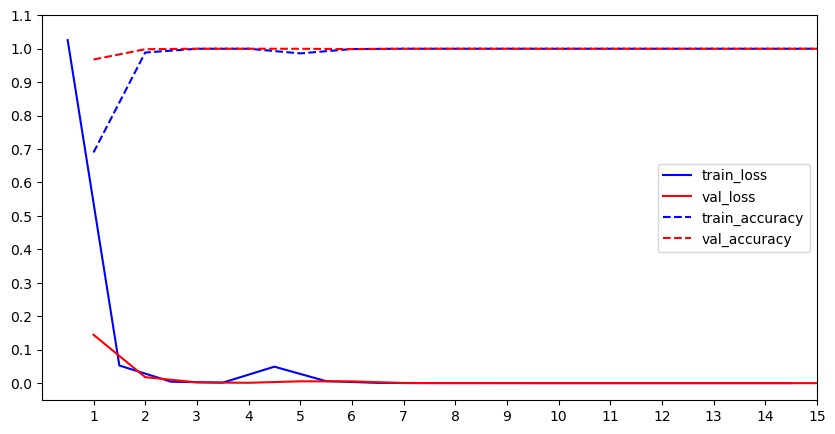

In [54]:
get_train_val_plots(h_1_2, yticks=np.arange(0, 1.2, 0.1))

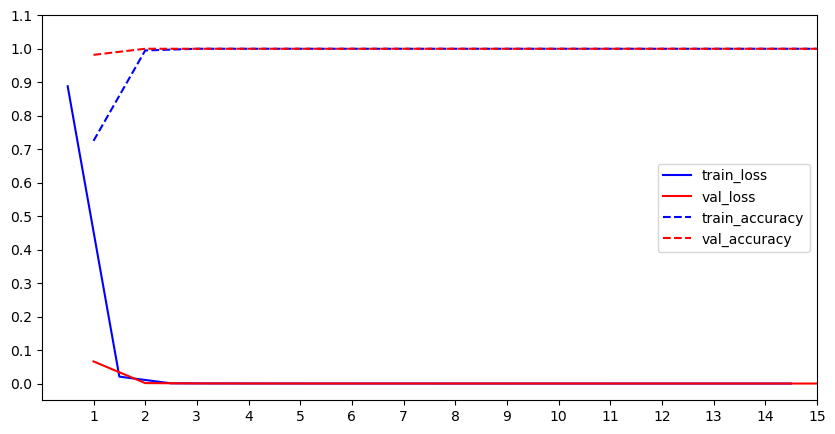

In [55]:
get_train_val_plots(h_1_3, yticks=np.arange(0, 1.2, 0.1))

Model 3 has the least loss on the validation data

## Filters

Our Models now contains 3 pairs of Convolution and Pooling layers

Number of filters maps can be

1. 8 - 16 - 32
2. 16 - 32 - 64
3. 24 - 48 - 96

In [56]:
# Models
# 'models/experiment-fmaps-1'
# 'models/experiment-fmaps-2'
# 'models/experiment-fmaps-3'

# History objects
# 'models/experiment-fmaps-1-history'
# 'models/experiment-fmaps-2-history'
# 'models/experiment-fmaps-3-history'

n_tests = 3

models = []
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)


for i in range(n_tests):
    model = keras.models.Sequential()
    models.append(model)
    model.add(keras.layers.Input(shape=(28, 28, 1)))
    for pairs in range(3):
        model.add(keras.layers.Conv2D((8*(i+1))*(2**pairs), (5, 5), padding='same', activation='relu'))
        model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(24, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    save_best_cb = keras.callbacks.ModelCheckpoint(f'models/experiment-fmaps-{i+1}', save_best_only=True)
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
    with open(f'models/experiment-fmaps-{i+1}-history', 'wb') as history_file:
        pickle.dump(history.history, history_file)

Epoch 1/10
607/610 [============================>.] - ETA: 0s - loss: 1.2932 - accuracy: 0.5959

INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


610/610 [==============================] - 16s 25ms/step - loss: 1.2897 - accuracy: 0.5967 - val_loss: 0.3501 - val_accuracy: 0.8885
Epoch 2/10
608/610 [============================>.] - ETA: 0s - loss: 0.1464 - accuracy: 0.9547

INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


610/610 [==============================] - 14s 23ms/step - loss: 0.1462 - accuracy: 0.9548 - val_loss: 0.0575 - val_accuracy: 0.9828
Epoch 3/10
610/610 [==============================] - 15s 24ms/step - loss: 0.0379 - accuracy: 0.9903 - val_loss: 0.0763 - val_accuracy: 0.9739
Epoch 4/10
608/610 [============================>.] - ETA: 0s - loss: 0.0141 - accuracy: 0.9968

INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


610/610 [==============================] - 14s 23ms/step - loss: 0.0141 - accuracy: 0.9968 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 5/10
608/610 [============================>.] - ETA: 0s - loss: 9.6183e-04 - accuracy: 0.9999

INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


610/610 [==============================] - 14s 23ms/step - loss: 9.6257e-04 - accuracy: 0.9999 - val_loss: 6.6201e-04 - val_accuracy: 1.0000
Epoch 6/10
610/610 [==============================] - ETA: 0s - loss: 5.4127e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


610/610 [==============================] - 14s 23ms/step - loss: 5.4127e-04 - accuracy: 1.0000 - val_loss: 5.4859e-04 - val_accuracy: 1.0000
Epoch 7/10
609/610 [============================>.] - ETA: 0s - loss: 3.4120e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


610/610 [==============================] - 15s 24ms/step - loss: 3.4107e-04 - accuracy: 1.0000 - val_loss: 2.6937e-04 - val_accuracy: 1.0000
Epoch 8/10
610/610 [==============================] - ETA: 0s - loss: 2.1061e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


610/610 [==============================] - 14s 23ms/step - loss: 2.1061e-04 - accuracy: 1.0000 - val_loss: 1.9176e-04 - val_accuracy: 1.0000
Epoch 9/10
610/610 [==============================] - 13s 22ms/step - loss: 0.0689 - accuracy: 0.9798 - val_loss: 0.0297 - val_accuracy: 0.9902
Epoch 10/10
610/610 [==============================] - 13s 22ms/step - loss: 0.0050 - accuracy: 0.9993 - val_loss: 5.9610e-04 - val_accuracy: 1.0000
Epoch 1/10
610/610 [==============================] - ETA: 0s - loss: 1.0555 - accuracy: 0.6763

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


610/610 [==============================] - 25s 40ms/step - loss: 1.0555 - accuracy: 0.6763 - val_loss: 0.1066 - val_accuracy: 0.9750
Epoch 2/10
609/610 [============================>.] - ETA: 0s - loss: 0.0658 - accuracy: 0.9828

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


610/610 [==============================] - 24s 40ms/step - loss: 0.0658 - accuracy: 0.9828 - val_loss: 0.0199 - val_accuracy: 0.9952
Epoch 3/10
610/610 [==============================] - ETA: 0s - loss: 0.0144 - accuracy: 0.9964

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


610/610 [==============================] - 25s 41ms/step - loss: 0.0144 - accuracy: 0.9964 - val_loss: 9.2643e-04 - val_accuracy: 1.0000
Epoch 4/10
609/610 [============================>.] - ETA: 0s - loss: 5.0735e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


610/610 [==============================] - 25s 42ms/step - loss: 5.0710e-04 - accuracy: 1.0000 - val_loss: 3.8891e-04 - val_accuracy: 1.0000
Epoch 5/10
610/610 [==============================] - ETA: 0s - loss: 2.5710e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


610/610 [==============================] - 25s 41ms/step - loss: 2.5710e-04 - accuracy: 1.0000 - val_loss: 2.6490e-04 - val_accuracy: 1.0000
Epoch 6/10
609/610 [============================>.] - ETA: 0s - loss: 1.6299e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


610/610 [==============================] - 25s 41ms/step - loss: 1.6292e-04 - accuracy: 1.0000 - val_loss: 1.8277e-04 - val_accuracy: 1.0000
Epoch 7/10
610/610 [==============================] - ETA: 0s - loss: 1.0843e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


610/610 [==============================] - 26s 43ms/step - loss: 1.0843e-04 - accuracy: 1.0000 - val_loss: 1.1629e-04 - val_accuracy: 1.0000
Epoch 8/10
610/610 [==============================] - ETA: 0s - loss: 6.9668e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


610/610 [==============================] - 25s 41ms/step - loss: 6.9668e-05 - accuracy: 1.0000 - val_loss: 7.7761e-05 - val_accuracy: 1.0000
Epoch 9/10
608/610 [============================>.] - ETA: 0s - loss: 4.8133e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


610/610 [==============================] - 23s 37ms/step - loss: 4.8219e-05 - accuracy: 1.0000 - val_loss: 6.1514e-05 - val_accuracy: 1.0000
Epoch 10/10
609/610 [============================>.] - ETA: 0s - loss: 3.3198e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


610/610 [==============================] - 23s 38ms/step - loss: 3.3214e-05 - accuracy: 1.0000 - val_loss: 4.0630e-05 - val_accuracy: 1.0000
Epoch 1/10
610/610 [==============================] - ETA: 0s - loss: 1.0392 - accuracy: 0.6778

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


610/610 [==============================] - 36s 58ms/step - loss: 1.0392 - accuracy: 0.6778 - val_loss: 0.1670 - val_accuracy: 0.9426
Epoch 2/10
609/610 [============================>.] - ETA: 0s - loss: 0.0437 - accuracy: 0.9893

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


610/610 [==============================] - 35s 58ms/step - loss: 0.0437 - accuracy: 0.9893 - val_loss: 0.0313 - val_accuracy: 0.9913
Epoch 3/10
609/610 [============================>.] - ETA: 0s - loss: 0.0078 - accuracy: 0.9979

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


610/610 [==============================] - 36s 59ms/step - loss: 0.0078 - accuracy: 0.9979 - val_loss: 6.3091e-04 - val_accuracy: 1.0000
Epoch 4/10
609/610 [============================>.] - ETA: 0s - loss: 3.6220e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


610/610 [==============================] - 36s 59ms/step - loss: 3.6217e-04 - accuracy: 1.0000 - val_loss: 2.7288e-04 - val_accuracy: 1.0000
Epoch 5/10
609/610 [============================>.] - ETA: 0s - loss: 1.8679e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


610/610 [==============================] - 36s 59ms/step - loss: 1.8672e-04 - accuracy: 1.0000 - val_loss: 1.5709e-04 - val_accuracy: 1.0000
Epoch 6/10
609/610 [============================>.] - ETA: 0s - loss: 1.1631e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


610/610 [==============================] - 37s 60ms/step - loss: 1.1670e-04 - accuracy: 1.0000 - val_loss: 1.0323e-04 - val_accuracy: 1.0000
Epoch 7/10
609/610 [============================>.] - ETA: 0s - loss: 7.7517e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


610/610 [==============================] - 40s 65ms/step - loss: 7.7577e-05 - accuracy: 1.0000 - val_loss: 6.9539e-05 - val_accuracy: 1.0000
Epoch 8/10
609/610 [============================>.] - ETA: 0s - loss: 5.0624e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


610/610 [==============================] - 37s 61ms/step - loss: 5.0643e-05 - accuracy: 1.0000 - val_loss: 4.6689e-05 - val_accuracy: 1.0000
Epoch 9/10
610/610 [==============================] - ETA: 0s - loss: 3.4877e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


610/610 [==============================] - 37s 60ms/step - loss: 3.4877e-05 - accuracy: 1.0000 - val_loss: 4.0471e-05 - val_accuracy: 1.0000
Epoch 10/10
609/610 [============================>.] - ETA: 0s - loss: 2.4945e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


610/610 [==============================] - 36s 59ms/step - loss: 2.4937e-05 - accuracy: 1.0000 - val_loss: 2.5266e-05 - val_accuracy: 1.0000


In [57]:
models[0].summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 16)        3216      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 32)          12832     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 3, 3, 32)        

In [58]:
models[1].summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 32)        12832     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 64)          51264     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 3, 3, 64)        

In [59]:
models[2].summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 24)        624       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 24)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 48)        28848     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 7, 7, 48)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 7, 7, 96)          115296    
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 3, 3, 96)        

In [60]:
for index in range(n_tests):
    model = keras.models.load_model(f'models/experiment-fmaps-{index+1}')
    model.evaluate(X_valid, y_valid)

249/249 [==============================] - 3s 13ms/step - loss: 2.5266e-05 - accuracy: 1.0000


In [61]:
h_2_1 = np.load('models/experiment-fmaps-1-history', allow_pickle=True)
h_2_2 = np.load('models/experiment-fmaps-2-history', allow_pickle=True)
h_2_3 = np.load('models/experiment-fmaps-3-history', allow_pickle=True)

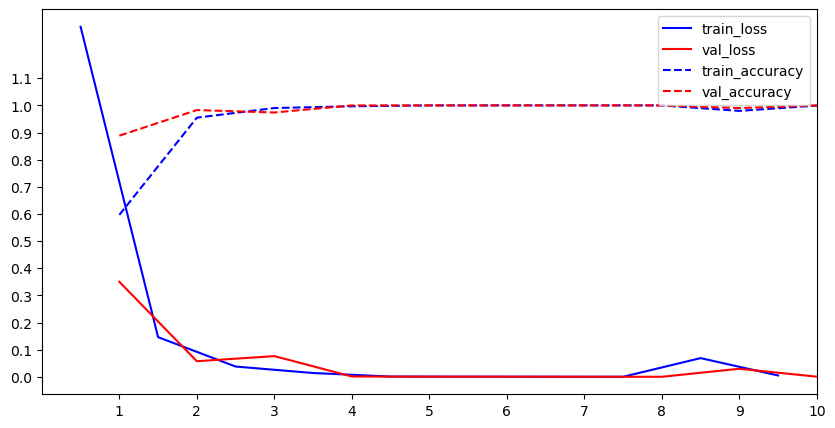

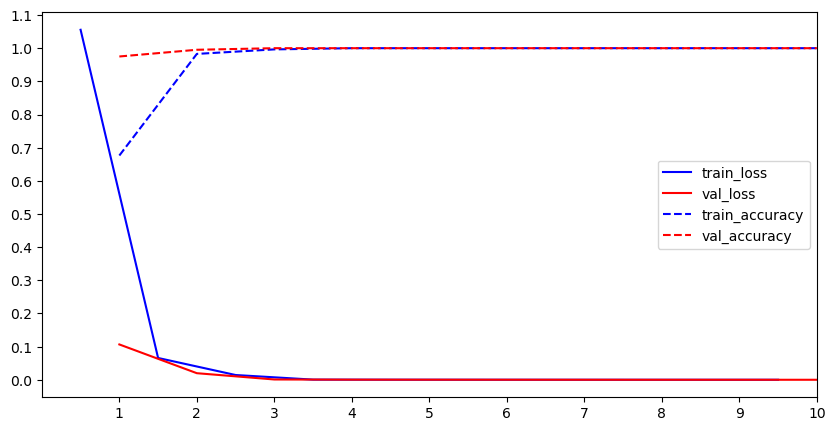

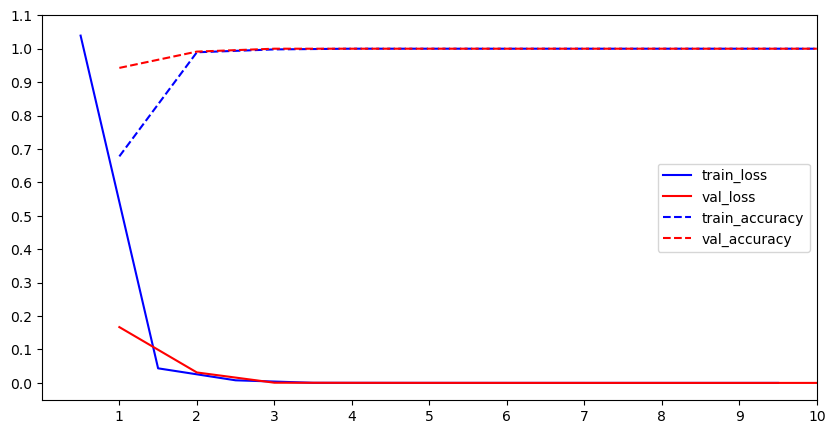

In [62]:
get_train_val_plots(h_2_1, yticks=np.arange(0, 1.2, 0.1))
get_train_val_plots(h_2_2, yticks=np.arange(0, 1.2, 0.1))
get_train_val_plots(h_2_3, yticks=np.arange(0, 1.2, 0.1))

Choose Model 3

## Filter Size

In [63]:
# Models
# 'models/experiment-fiters-1'

# History objects
# 'models/experiment-filters-1-history'

save_best_cb = keras.callbacks.ModelCheckpoint(f'models/experiment-fiters-1', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(24, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(48, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(96, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(24, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
with open(f'models/experiment-filters-1-history', 'wb') as history_file:
    pickle.dump(history.history, history_file)

Epoch 1/10
609/610 [============================>.] - ETA: 0s - loss: 1.0790 - accuracy: 0.6718

INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


610/610 [==============================] - 23s 38ms/step - loss: 1.0785 - accuracy: 0.6720 - val_loss: 0.1756 - val_accuracy: 0.9452
Epoch 2/10
608/610 [============================>.] - ETA: 0s - loss: 0.0750 - accuracy: 0.9797

INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


610/610 [==============================] - 22s 36ms/step - loss: 0.0749 - accuracy: 0.9797 - val_loss: 0.0198 - val_accuracy: 0.9969
Epoch 3/10
609/610 [============================>.] - ETA: 0s - loss: 0.0102 - accuracy: 0.9986

INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


610/610 [==============================] - 19s 32ms/step - loss: 0.0102 - accuracy: 0.9986 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 4/10
609/610 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


610/610 [==============================] - 20s 34ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 9.6153e-04 - val_accuracy: 1.0000
Epoch 5/10
610/610 [==============================] - 22s 36ms/step - loss: 0.0508 - accuracy: 0.9851 - val_loss: 0.0037 - val_accuracy: 0.9999
Epoch 6/10
608/610 [============================>.] - ETA: 0s - loss: 0.0019 - accuracy: 0.9997

INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


610/610 [==============================] - 19s 32ms/step - loss: 0.0019 - accuracy: 0.9997 - val_loss: 4.6985e-04 - val_accuracy: 1.0000
Epoch 7/10
609/610 [============================>.] - ETA: 0s - loss: 2.9314e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


610/610 [==============================] - 19s 31ms/step - loss: 2.9345e-04 - accuracy: 1.0000 - val_loss: 1.9573e-04 - val_accuracy: 1.0000
Epoch 8/10
608/610 [============================>.] - ETA: 0s - loss: 1.5840e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


610/610 [==============================] - 19s 32ms/step - loss: 1.5831e-04 - accuracy: 1.0000 - val_loss: 1.2471e-04 - val_accuracy: 1.0000
Epoch 9/10
608/610 [============================>.] - ETA: 0s - loss: 9.8444e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


610/610 [==============================] - 19s 31ms/step - loss: 9.8264e-05 - accuracy: 1.0000 - val_loss: 9.1316e-05 - val_accuracy: 1.0000
Epoch 10/10
608/610 [============================>.] - ETA: 0s - loss: 6.3555e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


610/610 [==============================] - 21s 34ms/step - loss: 6.3501e-05 - accuracy: 1.0000 - val_loss: 4.9172e-05 - val_accuracy: 1.0000


In [64]:
model = keras.models.load_model('models/experiment-fiters-1/')
model.evaluate(X_valid, y_valid)

249/249 [==============================] - 3s 11ms/step - loss: 4.9172e-05 - accuracy: 1.0000


[4.917227488476783e-05, 1.0]

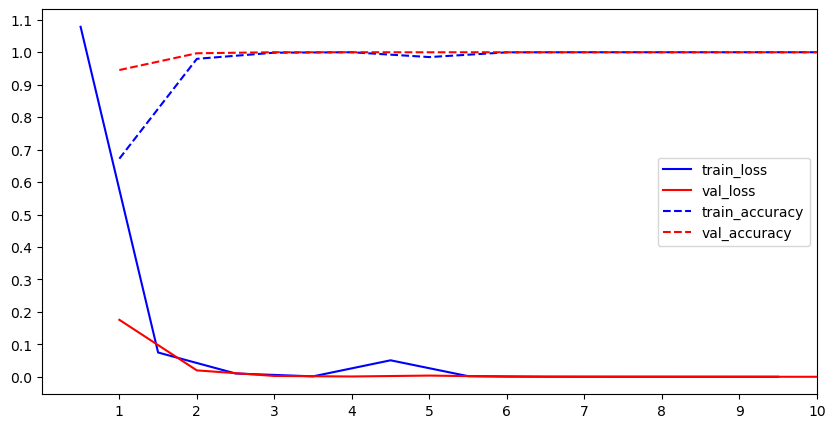

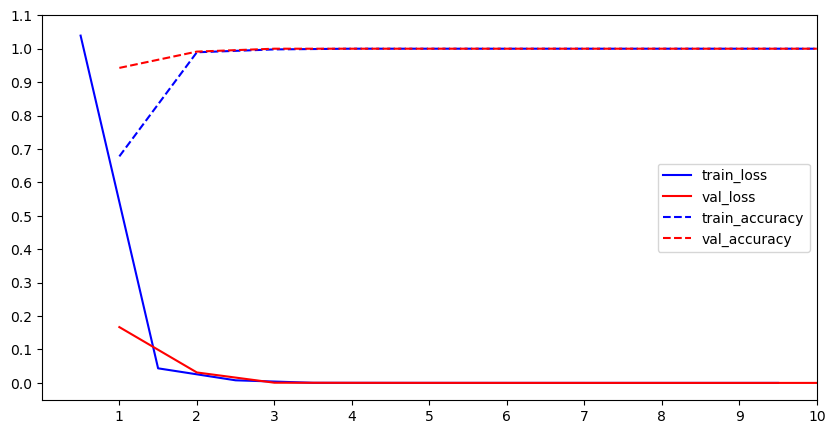

In [65]:
h_2_3 = np.load('models/experiment-fmaps-3-history', allow_pickle=True)
h = np.load('models/experiment-filters-1-history', allow_pickle=True)
get_train_val_plots(h, yticks=np.arange(0, 1.2, 0.1))
get_train_val_plots(h_2_3, yticks=np.arange(0, 1.2, 0.1))

We choose to use filter sizes of (5x5)

## Dropout

In [66]:
# Models
# 'models/experiment-dropout-0'
# 'models/experiment-dropout-1'
# 'models/experiment-dropout-2'

# History objects
# 'models/experiment-dropout-0-history'
# 'models/experiment-dropout-1-history'
# 'models/experiment-dropout-2-history'

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

dropout_rates = [0.3, 0.4, 0.5]

for index, i in enumerate(dropout_rates):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(24, (5, 5), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Conv2D(48, (5, 5), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Conv2D(96, (5, 5), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Dense(24, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    save_best_cb = keras.callbacks.ModelCheckpoint(f'models/experiment-dropout-{index}', save_best_only=True)
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
    with open(f'models/experiment-dropout-{index}-history', 'wb') as history_file:
        pickle.dump(history.history, history_file)

Epoch 1/10
609/610 [============================>.] - ETA: 0s - loss: 1.8254 - accuracy: 0.4254

INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


610/610 [==============================] - 38s 62ms/step - loss: 1.8248 - accuracy: 0.4257 - val_loss: 0.2728 - val_accuracy: 0.9270
Epoch 2/10
609/610 [============================>.] - ETA: 0s - loss: 0.3394 - accuracy: 0.8828

INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


610/610 [==============================] - 38s 62ms/step - loss: 0.3393 - accuracy: 0.8828 - val_loss: 0.0448 - val_accuracy: 0.9943
Epoch 3/10
609/610 [============================>.] - ETA: 0s - loss: 0.1433 - accuracy: 0.9530

INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


610/610 [==============================] - 39s 63ms/step - loss: 0.1433 - accuracy: 0.9530 - val_loss: 0.0082 - val_accuracy: 0.9989
Epoch 4/10
609/610 [============================>.] - ETA: 0s - loss: 0.0982 - accuracy: 0.9680

INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


610/610 [==============================] - 38s 62ms/step - loss: 0.0983 - accuracy: 0.9679 - val_loss: 0.0042 - val_accuracy: 0.9999
Epoch 5/10
609/610 [============================>.] - ETA: 0s - loss: 0.0743 - accuracy: 0.9756

INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


610/610 [==============================] - 39s 64ms/step - loss: 0.0743 - accuracy: 0.9756 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 6/10
610/610 [==============================] - ETA: 0s - loss: 0.0640 - accuracy: 0.9800

INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


610/610 [==============================] - 38s 63ms/step - loss: 0.0640 - accuracy: 0.9800 - val_loss: 9.9510e-04 - val_accuracy: 1.0000
Epoch 7/10
609/610 [============================>.] - ETA: 0s - loss: 0.0509 - accuracy: 0.9839

INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


610/610 [==============================] - 39s 65ms/step - loss: 0.0509 - accuracy: 0.9839 - val_loss: 4.2420e-04 - val_accuracy: 1.0000
Epoch 8/10
610/610 [==============================] - ETA: 0s - loss: 0.0510 - accuracy: 0.9844

INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


610/610 [==============================] - 42s 68ms/step - loss: 0.0510 - accuracy: 0.9844 - val_loss: 3.4018e-04 - val_accuracy: 1.0000
Epoch 9/10
610/610 [==============================] - ETA: 0s - loss: 0.0420 - accuracy: 0.9867

INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


610/610 [==============================] - 39s 64ms/step - loss: 0.0420 - accuracy: 0.9867 - val_loss: 1.8274e-04 - val_accuracy: 1.0000
Epoch 10/10
610/610 [==============================] - 43s 70ms/step - loss: 0.0398 - accuracy: 0.9880 - val_loss: 3.9957e-04 - val_accuracy: 1.0000
Epoch 1/10
609/610 [============================>.] - ETA: 0s - loss: 2.4572 - accuracy: 0.2407

INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


610/610 [==============================] - 40s 64ms/step - loss: 2.4566 - accuracy: 0.2409 - val_loss: 0.7039 - val_accuracy: 0.7884
Epoch 2/10
609/610 [============================>.] - ETA: 0s - loss: 0.7395 - accuracy: 0.7438

INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


610/610 [==============================] - 40s 66ms/step - loss: 0.7391 - accuracy: 0.7440 - val_loss: 0.1775 - val_accuracy: 0.9653
Epoch 3/10
609/610 [============================>.] - ETA: 0s - loss: 0.3948 - accuracy: 0.8648

INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


610/610 [==============================] - 39s 63ms/step - loss: 0.3950 - accuracy: 0.8648 - val_loss: 0.0659 - val_accuracy: 0.9897
Epoch 4/10
609/610 [============================>.] - ETA: 0s - loss: 0.2615 - accuracy: 0.9098

INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


610/610 [==============================] - 38s 63ms/step - loss: 0.2614 - accuracy: 0.9098 - val_loss: 0.0292 - val_accuracy: 0.9967
Epoch 5/10
610/610 [==============================] - ETA: 0s - loss: 0.2011 - accuracy: 0.9319

INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


610/610 [==============================] - 39s 63ms/step - loss: 0.2011 - accuracy: 0.9319 - val_loss: 0.0139 - val_accuracy: 0.9986
Epoch 6/10
609/610 [============================>.] - ETA: 0s - loss: 0.1541 - accuracy: 0.9494

INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


610/610 [==============================] - 39s 63ms/step - loss: 0.1542 - accuracy: 0.9494 - val_loss: 0.0101 - val_accuracy: 0.9997
Epoch 7/10
609/610 [============================>.] - ETA: 0s - loss: 0.1265 - accuracy: 0.9583

INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


610/610 [==============================] - 39s 63ms/step - loss: 0.1265 - accuracy: 0.9584 - val_loss: 0.0040 - val_accuracy: 0.9991
Epoch 8/10
609/610 [============================>.] - ETA: 0s - loss: 0.1173 - accuracy: 0.9625

INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


610/610 [==============================] - 39s 64ms/step - loss: 0.1172 - accuracy: 0.9626 - val_loss: 0.0035 - val_accuracy: 0.9991
Epoch 9/10
609/610 [============================>.] - ETA: 0s - loss: 0.1035 - accuracy: 0.9663

INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


610/610 [==============================] - 44s 73ms/step - loss: 0.1035 - accuracy: 0.9663 - val_loss: 0.0032 - val_accuracy: 0.9995
Epoch 10/10
609/610 [============================>.] - ETA: 0s - loss: 0.0945 - accuracy: 0.9681

INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


610/610 [==============================] - 36s 60ms/step - loss: 0.0945 - accuracy: 0.9681 - val_loss: 6.5835e-04 - val_accuracy: 1.0000
Epoch 1/10
609/610 [============================>.] - ETA: 0s - loss: 2.8346 - accuracy: 0.1421

INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


610/610 [==============================] - 37s 60ms/step - loss: 2.8338 - accuracy: 0.1424 - val_loss: 1.5688 - val_accuracy: 0.5834
Epoch 2/10
610/610 [==============================] - ETA: 0s - loss: 1.3634 - accuracy: 0.5408

INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


610/610 [==============================] - 37s 61ms/step - loss: 1.3634 - accuracy: 0.5408 - val_loss: 0.5679 - val_accuracy: 0.8494
Epoch 3/10
609/610 [============================>.] - ETA: 0s - loss: 0.8447 - accuracy: 0.7035

INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


610/610 [==============================] - 37s 61ms/step - loss: 0.8444 - accuracy: 0.7036 - val_loss: 0.2916 - val_accuracy: 0.9250
Epoch 4/10
609/610 [============================>.] - ETA: 0s - loss: 0.6268 - accuracy: 0.7779

INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


610/610 [==============================] - 37s 61ms/step - loss: 0.6267 - accuracy: 0.7779 - val_loss: 0.1766 - val_accuracy: 0.9717
Epoch 5/10
609/610 [============================>.] - ETA: 0s - loss: 0.5082 - accuracy: 0.8152

INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


610/610 [==============================] - 37s 61ms/step - loss: 0.5081 - accuracy: 0.8152 - val_loss: 0.1285 - val_accuracy: 0.9780
Epoch 6/10
609/610 [============================>.] - ETA: 0s - loss: 0.4240 - accuracy: 0.8497

INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


610/610 [==============================] - 40s 65ms/step - loss: 0.4244 - accuracy: 0.8495 - val_loss: 0.0715 - val_accuracy: 0.9897
Epoch 7/10
609/610 [============================>.] - ETA: 0s - loss: 0.3670 - accuracy: 0.8694

INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


610/610 [==============================] - 44s 72ms/step - loss: 0.3670 - accuracy: 0.8694 - val_loss: 0.0574 - val_accuracy: 0.9938
Epoch 8/10
609/610 [============================>.] - ETA: 0s - loss: 0.3351 - accuracy: 0.8851

INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


610/610 [==============================] - 37s 61ms/step - loss: 0.3351 - accuracy: 0.8850 - val_loss: 0.0431 - val_accuracy: 0.9947
Epoch 9/10
610/610 [==============================] - 36s 59ms/step - loss: 0.2923 - accuracy: 0.9008 - val_loss: 0.0434 - val_accuracy: 0.9957
Epoch 10/10
609/610 [============================>.] - ETA: 0s - loss: 0.2689 - accuracy: 0.9081

INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


610/610 [==============================] - 37s 61ms/step - loss: 0.2689 - accuracy: 0.9081 - val_loss: 0.0199 - val_accuracy: 0.9990


In [67]:
for index in range(3):
    model = keras.models.load_model(f'models/experiment-dropout-{index}')
    model.evaluate(X_valid, y_valid)

249/249 [==============================] - 4s 16ms/step - loss: 0.0199 - accuracy: 0.9990


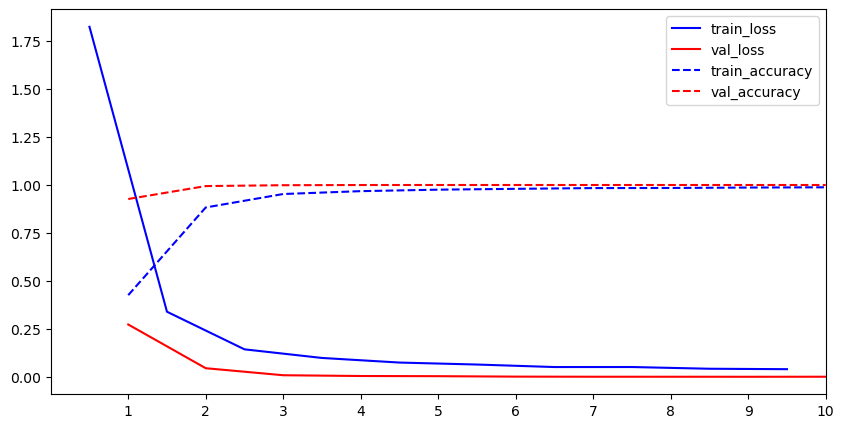

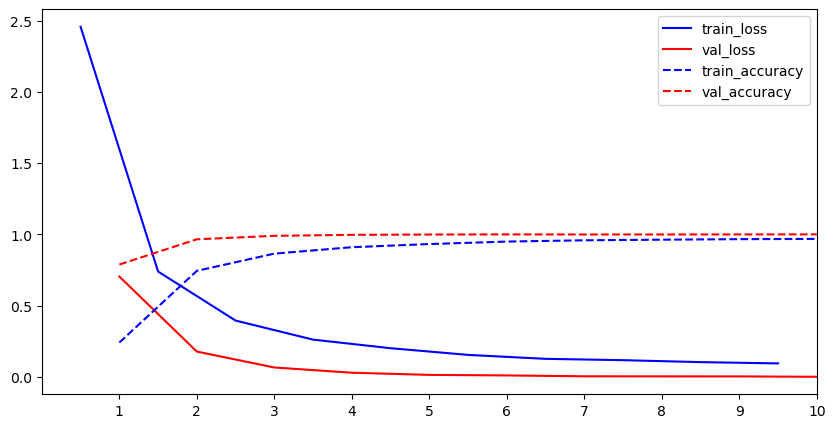

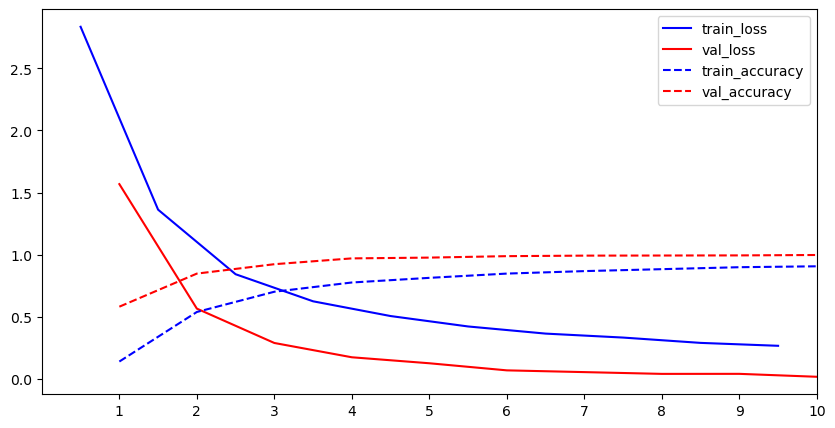

In [68]:
h_0 = np.load('models/experiment-dropout-0-history', allow_pickle=True)
h_1 = np.load('models/experiment-dropout-1-history', allow_pickle=True)
h_2 = np.load('models/experiment-dropout-2-history', allow_pickle=True)

get_train_val_plots(h_0)
get_train_val_plots(h_1)
get_train_val_plots(h_2)

Select Model 1

## Data Augmentation

In [69]:
# Sample Code

data_augmentation = keras.models.Sequential()
data_augmentation.add(keras.layers.RandomRotation(0.1, fill_mode='nearest', input_shape=(28, 28, 1)))
data_augmentation.add(keras.layers.RandomZoom((0.15, 0.2), fill_mode='nearest'))
data_augmentation.add(keras.layers.RandomTranslation(0.1, 0.1, fill_mode='nearest'))

model = keras.models.Sequential()
# Add the layers from the above model

Improves the models performance by decreasing the tendency to overfit

## Other Hyperparameters to try

1. Batch Normalization - It normalizes the layer inputs
2. Deeper networks work well - Replacing the single convolution layer of filter size (5X5) with two successive consecutive convolution layers of filter size (3X3)
3. Number of units in the dense layer and number of dense layers
4. Replacing the MaxPooling Layer with a convolution layer having a stride > 1
5. Optimizers
6. Learning rate of the optimizer

## Visualising the final model

In [73]:
!pip install pydot
!pip install graphviz
best_model = keras.models.load_model('models/experiment-dropout-0/')
plot_model(best_model, to_file='model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# Performance on the Test Set

In [74]:
test_df = pd.read_csv('data/alphabet/sign_mnist_test.csv')
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [75]:
best_model = keras.models.load_model('models/experiment-dropout-0/')

In [76]:
evaluate_model(best_model, X_test, y_test, label_binarizer)

225/225 [==============================] - 6s 24ms/step - loss: 15.4974 - accuracy: 0.9731
Loss: 15.497 Accuracy: 0.973


Accuracy: 97%

In [77]:
test_df = pd.read_csv('data/alphabet/sign_mnist_test.csv')
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [78]:
# Applying normalisation which is applied for X_train
X_test /= 255.0

In [79]:
best_model = keras.models.load_model('models/experiment-dropout-0/')

In [80]:
evaluate_model(best_model, X_test, y_test, label_binarizer)

225/225 [==============================] - 3s 11ms/step - loss: 0.0627 - accuracy: 0.9855
Loss: 0.063 Accuracy: 0.985


Accuracy: 98%